In [6]:
import pandas as pd
df = pd.read_excel("LOA_PPA_PLOA_detalhada.xlsx")
df.head(3)


,SKU REF.,PROJETO LEI,ORGAO ORCAMENTARIO,TITULO,FONTE,EXERCICIO FINANCEIRO,RECEITAS CORRENTES,RECEITAS DE CAPITAL,REFINANCIAMENTO DA DIVIDA PUBLICA FEDERAL,SOMA RECEITAS,DESPESA TOTAL
0,PLOA,PL 32/2022,Governo Federal,Receita dos Orçamentos Fiscal e da Seguridade ...,Orcamento da Uniao – Exercicio financeiro de 2...,2023-01-01,2365991535840,655123274758,2010264256580,3021114810598,5031379067178
1,PLOA,PL 19/2021,Governo Federal,Receita dos Orçamentos Fiscal e da Seguridade ...,Orcamento da Uniao – Exercicio financeiro de 2...,2022-01-01,2071225586271,663581737135,1884865486134,2734807323406,4619672809540
2,PLOA,PL 28/2020,Governo Federal,Receita dos Orçamentos Fiscal e da Seguridade ...,Orcamento da Uniao – Exercicio financeiro de 2...,2021-01-01,1629164611312,914893992129,1603521711208,2544058603441,4147580314649


In [7]:
# Ler o Excel com Pandas
df_xlsx = pd.ExcelFile("LOA_PPA_PLOA_detalhada.xlsx")

# Iterar por cada aba e salvar como CSV
for aba in df_xlsx.sheet_names:
    df = pd.read_excel(df_xlsx, aba)
    # Criar um nome de arquivo CSV baseado no nome da aba
    nome_arquivo_csv = f"{aba}.csv"
    df.to_csv(nome_arquivo_csv, index=False)  # index=False para não incluir o índice do DataFrame no CSV

In [ ]:
# carregamento do dataset para entendimento
import time
start_time = time.time()
f_receita_orc_md = pd.read_csv(r'Receitas_Un.Orcam_MD_AnexoI.csv')
end_time = time.time()
elapsed_time = end_time - start_time
print(f"O código levou {elapsed_time} segundos para executar")
display(f_receita_orc_md)
#f_receita_orc_md.tail()

In [11]:
#Entendimento do Dataset e obtenção de informações gerais
f_receita_orc_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   SKU REF.              138 non-null    object
 1   FA                    138 non-null    object
 2   SKU                   138 non-null    int64 
 3   ORGAO ORCAMENTARIO    138 non-null    object
 4   TITULO                138 non-null    object
 5   FONTE                 138 non-null    object
 6   EXERCICIO FINANCEIRO  138 non-null    int64 
 7   VALOR                 138 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 8.8+ KB


In [12]:
df_describe = f_receita_orc_md.describe()

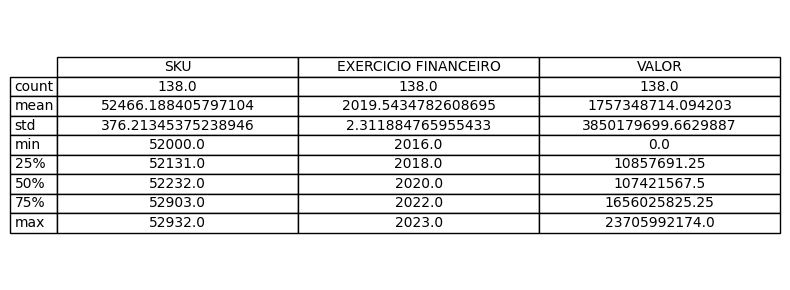

In [13]:
import matplotlib.pyplot as plt
from pandas.plotting import table

fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('off')
the_table = table(ax, df_describe, loc='center', cellLoc='center')    
plt.tight_layout()
plt.show()
               

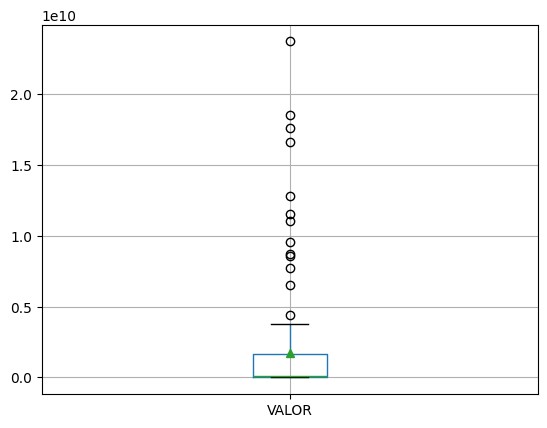

In [15]:
# gráfico de boxplot para análise da dispersão do dados da coluna valor
boxplot = f_receita_orc_md.boxplot(column=['VALOR'], showmeans=True)

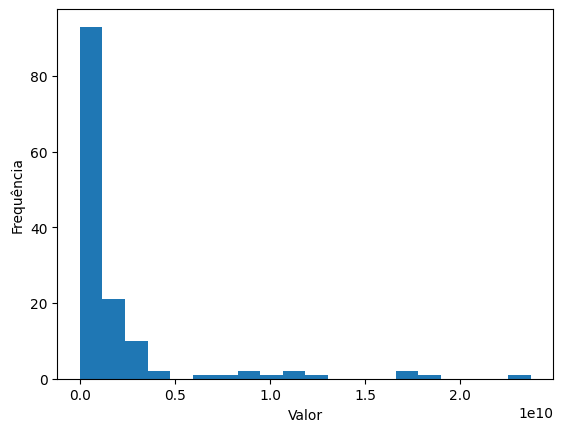

In [16]:
f_receita_orc_md['VALOR'].plot(kind='hist', bins=20)
plt.xlabel('Valor')
#plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('Frequência')
#plt.title('Distribuição dos Valores Financeiros')
plt.show()

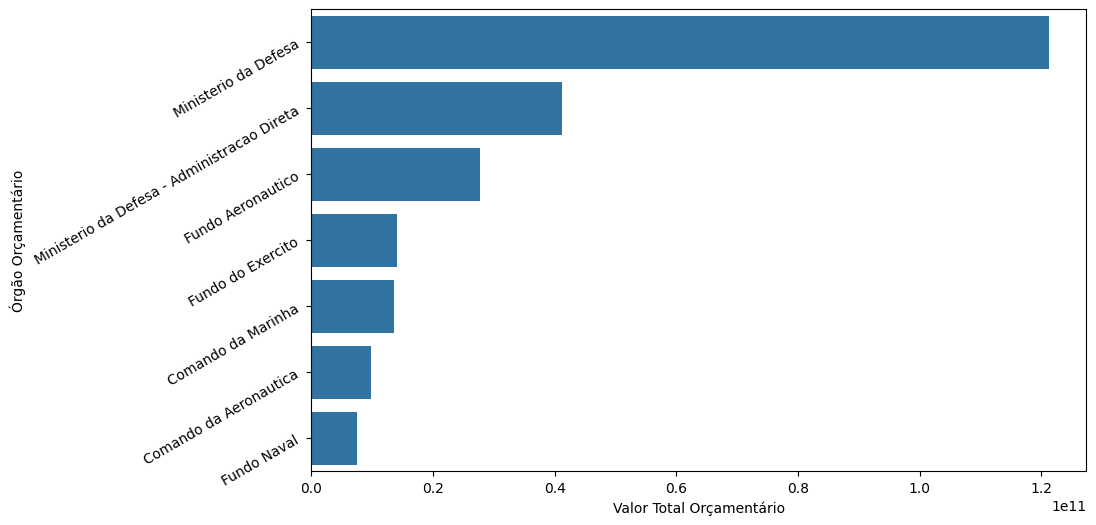

In [17]:
import seaborn as sns
# 1. Agrupar por 'ORGAO ORCAMENTARIO' e somar os 'VALOR'
top7_orgaos = f_receita_orc_md.groupby('ORGAO ORCAMENTARIO')['VALOR'].sum().reset_index()

# 2. Ordenar os resultados e selecionar os top 7
top7_orgaos = top7_orgaos.sort_values(by='VALOR', ascending=False).head(7)

# 3. Criar um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='VALOR', y='ORGAO ORCAMENTARIO', data=top7_orgaos)
#plt.title('Top 7 Órgãos Orçamentários por Valor Total')
plt.xlabel('Valor Total Orçamentário')
plt.ylabel('Órgão Orçamentário')
plt.yticks(rotation=30)  # Rotação dos rótulos do eixo y, se necessário
plt.show()


<Axes: xlabel='ORGAO ORCAMENTARIO'>

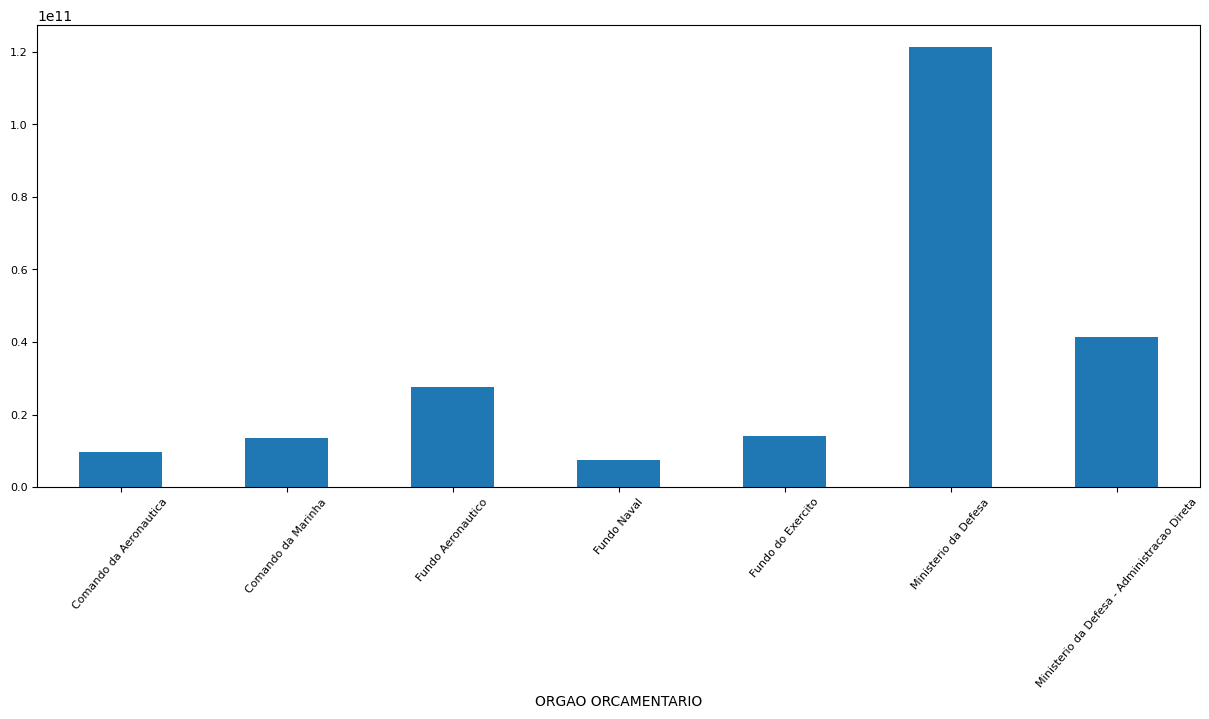

In [18]:
top7_orgaos.groupby('ORGAO ORCAMENTARIO')['VALOR'].sum().plot(kind='bar', rot=50, figsize=(15, 6), fontsize=8)

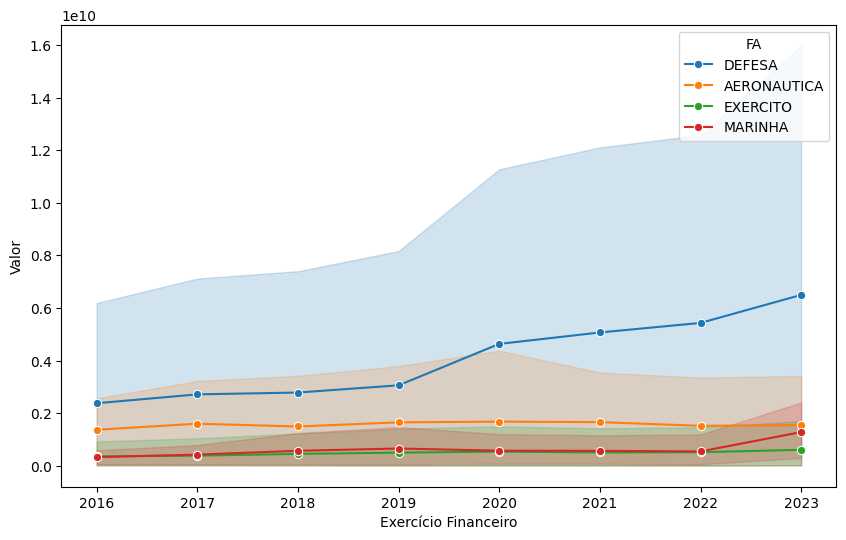

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=f_receita_orc_md, x='EXERCICIO FINANCEIRO', y='VALOR', hue='FA', marker='o')
#plt.title('Tendência de Valores Orçamentários por Ano e Força Armada')
plt.xlabel('Exercício Financeiro')
plt.ylabel('Valor')
plt.show()

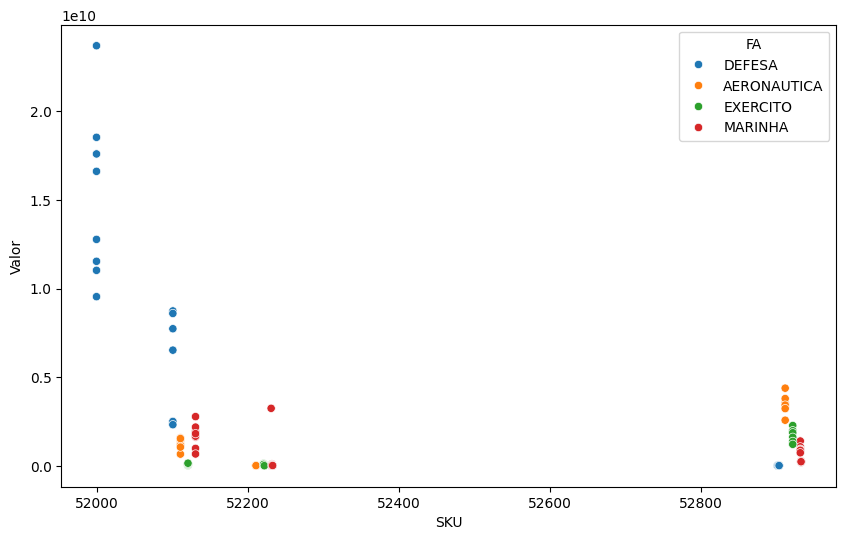

In [20]:
# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=f_receita_orc_md, x='SKU', y='VALOR', hue='FA')
#plt.title('Relação entre SKU e Valor Orçamentário')
plt.xlabel('SKU')
plt.ylabel('Valor')
plt.show()

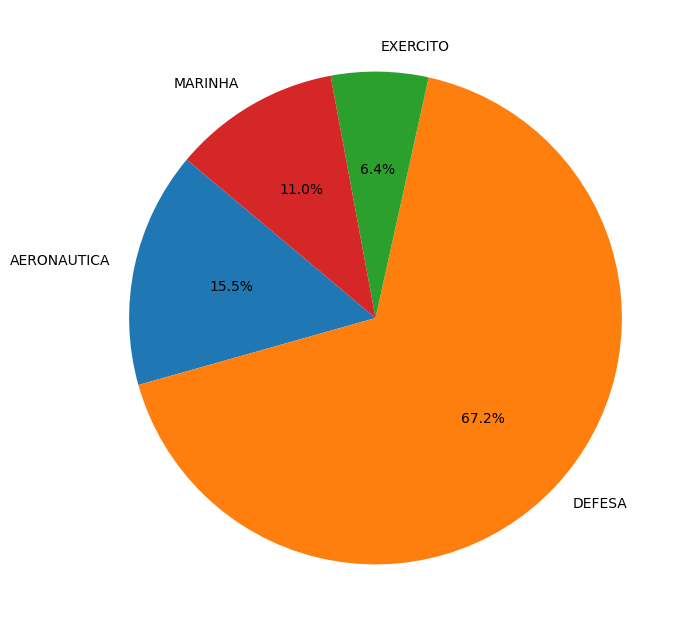

In [21]:
# Criando o resumo do DataFrame
df_sum = f_receita_orc_md.groupby('FA')['VALOR'].sum().reset_index()

# Gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(df_sum['VALOR'], labels=df_sum['FA'], autopct='%1.1f%%', startangle=140)
#plt.title('Proporção Orçamentária por Força Armada')
plt.show()

<Axes: xlabel='FA'>

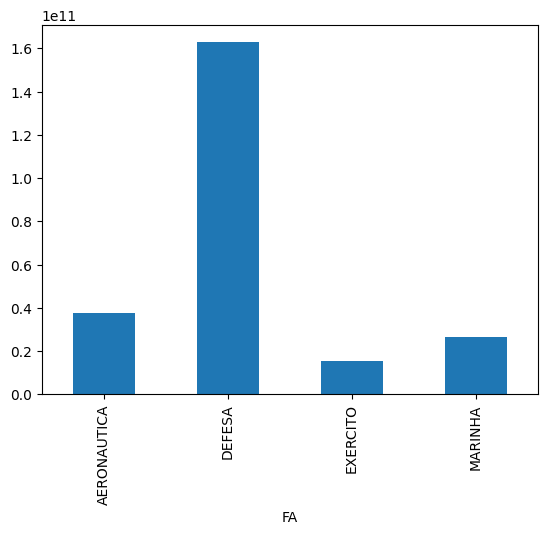

In [22]:
# Suponha que df_receita_orcamento_md seja o seu DataFrame
# df_receita_orcamento_md = ...

# Gráfico de Barra
f_receita_orc_md.groupby('FA')['VALOR'].sum().plot(kind='bar')


<Axes: xlabel='EXERCICIO FINANCEIRO'>

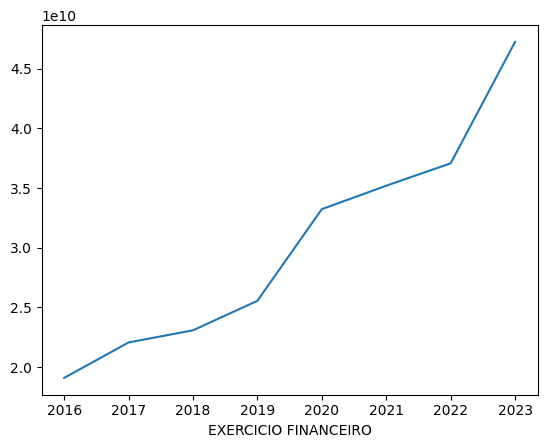

In [23]:
# Gráfico de Linha
f_receita_orc_md.groupby('EXERCICIO FINANCEIRO')['VALOR'].sum().plot(kind='line')


<Axes: xlabel='SKU', ylabel='VALOR'>

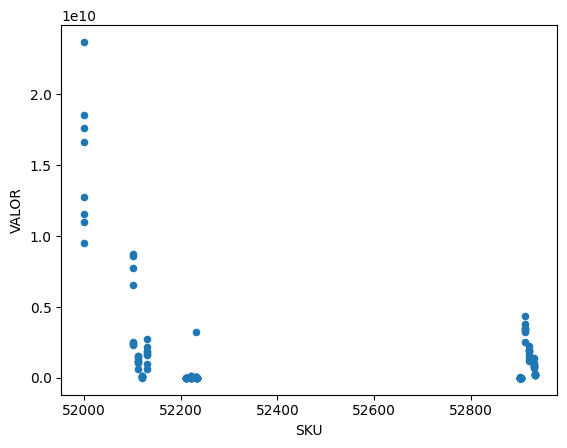

In [24]:
# Gráfico de Dispersão
f_receita_orc_md.plot(kind='scatter', x='SKU', y='VALOR')


<Axes: ylabel='VALOR'>

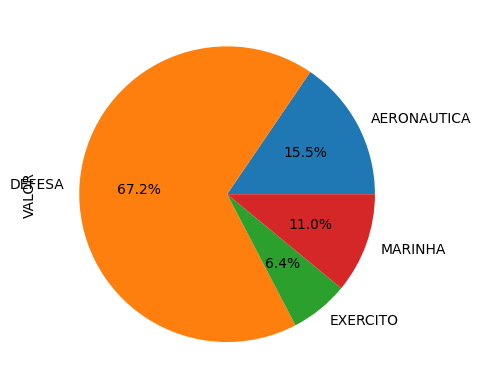

In [25]:
f_receita_orc_md.groupby('FA')['VALOR'].sum().plot(kind='pie', autopct='%1.1f%%')

In [26]:
# Obtendo valores únicos de uma coluna
f_receita_orc_md['ORGAO ORCAMENTARIO'].unique()
f_receita_orc_md['TITULO'].unique()

array(['Receitas de Todas as Fontes por Orgao e Unidade Orcamentaria',
       'Receitas de Todas as Fontes por Órgão e Unidade Orçamentária'],
      dtype=object)

In [27]:
# Renomeando as colunas
format_receita_md = f_receita_orc_md.rename(columns={
    'SKU': 'Codigo',
    'VALOR': 'Receita'
})
# Convertendo a coluna 'Codigo' para string
format_receita_md['Codigo'] = format_receita_md['Codigo'].astype(str)

# formatação da coluna FONTE para resumo das informações
# Definindo uma função para aplicar a lógica de case_when
def redefinir_fonte(fonte):
    if "LDO-2023" in fonte:
        return "LDO-2023"
    elif "LDO-2022" in fonte:
        return "LDO-2022"
    elif "LDO-2021" in fonte:
        return "LDO-2021"
    elif "LDO-2020" in fonte:
        return "LDO-2020"
    elif "LDO-2019" in fonte:
        return "LDO-2019"
    elif "LDO-2018" in fonte:
        return "LDO-2018"
    elif "LDO-2017" in fonte:
        return "LDO-2017"
    elif "LDO-2016" in fonte:
        return "LDO-2016"
    else:
        return fonte

# Aplicando a função ao DataFrame
format_receita_md['FONTE'] = format_receita_md['FONTE'].apply(redefinir_fonte)

format_receita_md.drop(columns=['SKU REF.', 'TITULO'], inplace=True)

In [28]:
# Aplicando estilo ao DataFrame
styled_df = format_receita_md.style.set_table_attributes('class="table table-striped"').set_properties(**{'font-size': '10pt'})

# Exibindo o DataFrame estilizado
styled_df

,FA,Codigo,ORGAO ORCAMENTARIO,FONTE,EXERCICIO FINANCEIRO,Receita
0,DEFESA,52000,Ministerio da Defesa,LDO-2023,2023,23705992174
1,DEFESA,52101,Ministerio da Defesa - Administracao Direta,LDO-2023,2023,8736247276
2,AERONAUTICA,52111,Comando da Aeronautica,LDO-2023,2023,1208795261
3,EXERCITO,52121,Comando do Exercito,LDO-2023,2023,51504959
4,MARINHA,52131,Comando da Marinha,LDO-2023,2023,2771674289
5,AERONAUTICA,52211,Caixa de Financiamento Imobiliario da Aeronautica,LDO-2023,2023,13022428
6,EXERCITO,52221,Industria de Material Belico do Brasil IMBEL,LDO-2023,2023,112717402
7,EXERCITO,52222,Fundacao Osorio,LDO-2023,2023,377006
8,MARINHA,52231,Empresa Gerencial de Projetos Navais - EMGEPRON,LDO-2023,2023,3239426689
9,MARINHA,52232,Caixa de Construcoes de Casas para o Pessoal da Marinha - CCCPM,LDO-2023,2023,86949503


In [30]:
# Configurando o Pandas para exibir números sem notação científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#-> para reverter a configuração para voltar a utlizar notação científica. 
#pd.reset_option('display.float_format')

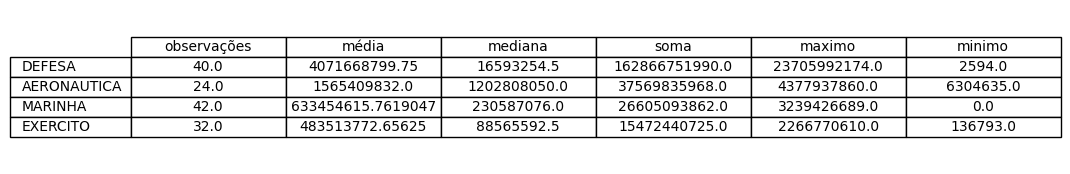

In [31]:
# Agrupando por 'FA' e calculando as estatísticas desejadas
desc_FA_Receita = format_receita_md.groupby('FA').agg(
    observações=('Receita', 'count'),
    média=('Receita', 'mean'),
    mediana=('Receita', 'median'),
    soma=('Receita', 'sum'),
    maximo=('Receita', 'max'),
    minimo=('Receita', 'min')
).sort_values(by='maximo', ascending=False)

# Exibindo o resultado
#print(desc_FA_Receita)
# Criando a figura
fig, ax = plt.subplots(figsize=(10, 2))  # Ajuste o tamanho conforme necessário
ax.axis('off')  # Desativa os eixos

# Adicionando a tabela
tab = table(ax, desc_FA_Receita, loc='center', cellLoc='center')
# Ajustando o estilo da tabela, se necessário
tab.auto_set_font_size(False)
tab.set_fontsize(10)
tab.scale(1.2, 1.2)  # Ajuste o tamanho conforme necessário

# Salvando a figura
plt.savefig('tabela.png')

# Exibindo a figura
plt.show()

In [32]:
# Filtrando o DataFrame
filtered_df = format_receita_md.groupby('FA').apply(
    lambda x: x[(x['EXERCICIO FINANCEIRO'] >= 2022) & (x['Receita'] > 483513773)]
).reset_index(drop=True)

filtered_df

,FA,Codigo,ORGAO ORCAMENTARIO,FONTE,EXERCICIO FINANCEIRO,Receita
0,AERONAUTICA,52111,Comando da Aeronautica,LDO-2023,2023,1208795261
1,AERONAUTICA,52911,Fundo Aeronautico,LDO-2023,2023,3417612683
2,AERONAUTICA,52111,Comando da Aeronautica,LDO-2022,2022,1196820839
3,AERONAUTICA,52911,Fundo Aeronautico,LDO-2022,2022,3353711878
4,DEFESA,52000,Ministerio da Defesa,LDO-2023,2023,23705992174
5,DEFESA,52101,Ministerio da Defesa - Administracao Direta,LDO-2023,2023,8736247276
6,DEFESA,52000,Ministerio da Defesa,LDO-2022,2022,18535782538
7,DEFESA,52101,Ministerio da Defesa - Administracao Direta,LDO-2022,2022,8593872028
8,EXERCITO,52921,Fundo do Exercito,LDO-2023,2023,2266770610
9,EXERCITO,52921,Fundo do Exercito,LDO-2022,2022,1945889227


In [33]:
num_rows = len(format_receita_md)
top_10_percent = int(num_rows * 0.10)  # Calculando 10% do número total de linhas

# Ordenando por 'Receita' e pegando as top 10%
top_receitas = format_receita_md.sort_values(by='Receita', ascending=False).iloc[:top_10_percent]

#top_receitas.head(10)

In [34]:
# Ordenando por 'Receita' e pegando as bottom 10%
bottom_receitas = format_receita_md.sort_values(by='Receita', ascending=True).iloc[:top_10_percent]
bottom_receitas.head(10)

,FA,Codigo,ORGAO ORCAMENTARIO,FONTE,EXERCICIO FINANCEIRO,Receita
17,MARINHA,52233,Amazonia Azul Tecnologias de Defesa S.A. - AMAZUL,LDO-2023,2023,0
26,MARINHA,52231,Empresa Gerencial de Projetos Navais - EMGEPRON,LDO-2022,2022,0
35,MARINHA,52233,Amazonia Azul Tecnologias de Defesa S.A. - AMAZUL,LDO-2022,2022,0
52,MARINHA,52233,Amazonia Azul Tecnologias de Defesa S.A. - AMAZUL,LDO-2021,2021,0
86,MARINHA,52233,Amazonia Azul Tecnologias de Defesa S.A. - AMAZUL,LDO-2019,2019,0
69,MARINHA,52233,Amazonia Azul Tecnologias de Defesa S.A. - AMAZUL,LDO-2020,2020,0
46,DEFESA,52902,Fundo de Administracao do Hospital das Forcas ...,LDO-2021,2021,2594
77,EXERCITO,52222,Fundacao Osorio,LDO-2019,2019,136793
43,EXERCITO,52222,Fundacao Osorio,LDO-2021,2021,200451
7,EXERCITO,52222,Fundacao Osorio,LDO-2023,2023,377006


In [37]:
# importação e formatação da tabela de despesa orçamento MD
f_despesa_md = pd.read_csv(r"Despesa_por_Un._TipoI.csv")

format_despesa_md = f_despesa_md.rename(columns={
    'SKU': 'Codigo',
    'TOTAL': 'Despesa',
    'TOTAL 2-9': 'Despesa 2-9' 
})
# Convertendo a coluna 'Codigo' para string
format_despesa_md['Codigo'] = format_despesa_md['Codigo'].astype(str)
#Excluindo as colunas que não serão utilizadas
format_despesa_md.drop(columns=['SKU REF.', 'FA', 'ORGAO ORCAMENTARIO', 'TITULO', 'FONTE'], inplace=True)
format_despesa_md.head(3)

,Codigo,EXERCICIO FINANCEIRO,1-Pessoal e Encargos Sociais,2-Juros e Encargos da Divida,3-Outras Despesas Correntes,4-Investimentos,5-Inversoes Financeiras,6-Amortizacao da Divida,7-Reserva de Regime Proprio da Previdencia Social RPPS,8-N/A,9-Reserva de Contingencia,Despesa,Despesa 2-9
0,52101,2023,178366694,0,1116216767,1529795730,0,0,0,0,0,2824379191,5470391688
1,52111,2023,21541524168,783658286,1169361566,1947271833,0,663194004,0,0,0,26105009857,30668495546
2,52121,2023,47100748292,0,3873631933,1840375304,0,0,0,0,40060000,52854815529,58608882766


In [38]:
#md_receita_despesa <- left_join(format_receita_md, format_despesa_md, by = c("Codigo", "EXERCICIO FINANCEIRO"))
md_receita_despesa = pd.merge(format_receita_md, format_despesa_md, on=['Codigo', 'EXERCICIO FINANCEIRO'], how='left')
#md_receita_despesa.head(3)

In [39]:

vetor_variaveis_selecionadas = ["Receita", "Despesa", "Despesa 2-9"]

# Aplicar a função describe em cada coluna selecionada após remover NA
estatisticas_orcamento = {coluna: md_receita_despesa[coluna].dropna().describe() for coluna in vetor_variaveis_selecionadas}

# Para ver o resultado
print(estatisticas_orcamento)

{'Receita': count           138.000
mean     1757348714.094
std      3850179699.663
min               0.000
25%        10857691.250
50%       107421567.500
75%      1656025825.250
max     23705992174.000
Name: Receita, dtype: float64, 'Despesa': count           130.000
mean     5865919710.192
std     11658838536.758
min               0.000
25%        26650962.750
50%       273069605.000
75%      3127577764.000
max     52854815529.000
Name: Despesa, dtype: float64, 'Despesa 2-9': count           130.000
mean     7404531835.977
std     13477713592.449
min               0.000
25%        37211799.000
50%       395674567.500
75%      6219206721.500
max     58608882766.000
Name: Despesa 2-9, dtype: float64}


In [40]:

vetor_variaveis_selecionadas = ["Receita", "Despesa", "Despesa 2-9"]

# Função para formatar a saída similar ao summary do R
def summary_like(df, col):
    stats = df[col].dropna().describe(percentiles=[.25, .5, .75])
    stats = stats.rename(index={'25%': '1st Qu.', '50%': 'Median', '75%': '3rd Qu.'})
    return stats.loc[['min', '1st Qu.', 'Median', 'mean', '3rd Qu.', 'max']]

# Aplicando a função para cada coluna e armazenando os resultados
estatisticas_orcamento = {coluna: summary_like(md_receita_despesa, coluna) for coluna in vetor_variaveis_selecionadas}

# Para ver o resultado
for coluna, stats in estatisticas_orcamento.items():
    print(f"{coluna}:\n{stats}\n")


Receita:
min                 0.000
1st Qu.      10857691.250
Median      107421567.500
mean       1757348714.094
3rd Qu.    1656025825.250
max       23705992174.000
Name: Receita, dtype: float64

Despesa:
min                 0.000
1st Qu.      26650962.750
Median      273069605.000
mean       5865919710.192
3rd Qu.    3127577764.000
max       52854815529.000
Name: Despesa, dtype: float64

Despesa 2-9:
min                 0.000
1st Qu.      37211799.000
Median      395674567.500
mean       7404531835.977
3rd Qu.    6219206721.500
max       58608882766.000
Name: Despesa 2-9, dtype: float64



In [41]:
# Calculando a quantidade de valores NA em cada coluna
qtd_na = md_receita_despesa.isna().sum()
# Exibindo o resultado
#print(qtd_na)

# Filtrando linhas que contêm pelo menos um valor NA
linhas_na = md_receita_despesa[md_receita_despesa.isna().any(axis=1)]
#print(linhas_na)

# Filtrando linhas onde todas as colunas têm o valor ""
linhas_vazias = md_receita_despesa[(md_receita_despesa == "").all(axis=1)]
#print(linhas_vazias)

# Filtrando para manter apenas linhas completas (sem valores NA)
md_receita_despesa = md_receita_despesa.dropna()

#md_receita_despesa.drop(columns=['8-N/A', '9-Reserva de Contingencia'], inplace=True)

print(md_receita_despesa)

              FA Codigo                                 ORGAO ORCAMENTARIO  \
1         DEFESA  52101        Ministerio da Defesa - Administracao Direta   
2    AERONAUTICA  52111                             Comando da Aeronautica   
3       EXERCITO  52121                                Comando do Exercito   
4        MARINHA  52131                                 Comando da Marinha   
5    AERONAUTICA  52211  Caixa de Financiamento Imobiliario da Aeronautica   
..           ...    ...                                                ...   
133       DEFESA  52903                           Fundo do Servico Militar   
134  AERONAUTICA  52911                                  Fundo Aeronautico   
135     EXERCITO  52921                                  Fundo do Exercito   
136      MARINHA  52931                                        Fundo Naval   
137      MARINHA  52932  Fundo de Desenvolvimento do Ensino Profissiona...   

        FONTE  EXERCICIO FINANCEIRO     Receita  1-Pessoal e En

In [42]:
# Calculando a proporção de 'Receita' e 'Despesa'
proporcao_receita = md_receita_despesa['Receita'] / md_receita_despesa['Receita'].sum()
proporcao_despesa = md_receita_despesa['Despesa'] / md_receita_despesa['Despesa'].sum()

# Definindo os rótulos das categorias
labels = ["muito baixo", "baixo", "médio", "alto", "muito alto"]

# Categorizando 'Receita'
md_receita_despesa['Categoria Receita'] = pd.qcut(proporcao_receita, 
                                                  q=[0, .2, .4, .6, .8, 1],
                                                  labels=labels)

# Categorizando 'Despesa'
md_receita_despesa['Categoria Despesa'] = pd.qcut(proporcao_despesa, 
                                                  q=[0, .2, .4, .6, .8, 1],
                                                  labels=labels)

# Exibindo o DataFrame enriquecido
display(md_receita_despesa)

,FA,Codigo,ORGAO ORCAMENTARIO,FONTE,EXERCICIO FINANCEIRO,Receita,1-Pessoal e Encargos Sociais,2-Juros e Encargos da Divida,3-Outras Despesas Correntes,4-Investimentos,5-Inversoes Financeiras,6-Amortizacao da Divida,7-Reserva de Regime Proprio da Previdencia Social RPPS,8-N/A,9-Reserva de Contingencia,Despesa,Despesa 2-9,Categoria Receita,Categoria Despesa
1,DEFESA,52101,Ministerio da Defesa - Administracao Direta,LDO-2023,2023,8736247276,178366694.000,0.000,1116216767.000,1529795730.000,0.000,0.000,0.000,0.000,0.000,2824379191.000,5470391688.000,muito alto,alto
2,AERONAUTICA,52111,Comando da Aeronautica,LDO-2023,2023,1208795261,21541524168.000,783658286.000,1169361566.000,1947271833.000,0.000,663194004.000,0.000,0.000,0.000,26105009857.000,30668495546.000,alto,muito alto
3,EXERCITO,52121,Comando do Exercito,LDO-2023,2023,51504959,47100748292.000,0.000,3873631933.000,1840375304.000,0.000,0.000,0.000,0.000,40060000.000,52854815529.000,58608882766.000,médio,muito alto
4,MARINHA,52131,Comando da Marinha,LDO-2023,2023,2771674289,25133032781.000,368019077.000,1754587645.000,2014224441.000,0.000,1236564332.000,0.000,0.000,875261835.000,31381690111.000,37630347441.000,muito alto,muito alto
5,AERONAUTICA,52211,Caixa de Financiamento Imobiliario da Aeronautica,LDO-2023,2023,13022428,1564551.000,0.000,2165608.000,170000.000,0.000,0.000,0.000,0.000,9293011.000,13193170.000,24821789.000,baixo,muito baixo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,DEFESA,52903,Fundo do Servico Militar,LDO-2016,2016,7132056,0.000,0.000,5681784.000,1450272.000,0.000,0.000,0.000,0.000,0.000,7132056.000,14264112.000,baixo,muito baixo
134,AERONAUTICA,52911,Fundo Aeronautico,LDO-2016,2016,2568966238,0.000,0.000,1498164537.000,1059144761.000,4850000.000,0.000,0.000,0.000,6806940.000,2568966238.000,5137932476.000,muito alto,alto
135,EXERCITO,52921,Fundo do Exercito,LDO-2016,2016,1207720536,0.000,0.000,1052052085.000,51910673.000,0.000,0.000,0.000,0.000,106359246.000,1210322004.000,2420644008.000,alto,alto
136,MARINHA,52931,Fundo Naval,LDO-2016,2016,731487183,0.000,0.000,623715447.000,56055226.000,0.000,0.000,0.000,0.000,52293095.000,732063768.000,1464127536.000,alto,médio


In [43]:
# Salvando format_df__receita_md como um arquivo CSV
format_receita_md.to_csv("df_receita_md.csv", index=False)

# Salvando f_despesa_md como um arquivo CSV
format_despesa_md.to_csv("df_despesa_md.csv", index=False)

# Salvando md_receita_despesa como um arquivo CSV
md_receita_despesa.to_csv("orcamento_md.csv", index=False)
